In [1]:
%pip install seaborn

In [2]:
%pip install textblob

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
import os

In [4]:
df = pd.read_csv("twitter_validation.csv", header=None)

In [5]:
print(df.head())

      0          1           2  \
0  3364   Facebook  Irrelevant   
1   352     Amazon     Neutral   
2  8312  Microsoft    Negative   
3  4371      CS-GO    Negative   
4  4433     Google     Neutral   

                                                   3  
0  I mentioned on Facebook that I was struggling ...  
1  BBC News - Amazon boss Jeff Bezos rejects clai...  
2  @Microsoft Why do I pay for WORD when it funct...  
3  CSGO matchmaking is so full of closet hacking,...  
4  Now the President is slapping Americans in the...  


In [6]:
print(df.iloc[:, -1].head())

0    I mentioned on Facebook that I was struggling ...
1    BBC News - Amazon boss Jeff Bezos rejects clai...
2    @Microsoft Why do I pay for WORD when it funct...
3    CSGO matchmaking is so full of closet hacking,...
4    Now the President is slapping Americans in the...
Name: 3, dtype: object


In [7]:
import pandas as pd
from textblob import TextBlob

# Function to analyze sentiment
def analyze_sentiment(text):
    if isinstance(text, str):
        analysis = TextBlob(text)
        polarity = analysis.sentiment.polarity
        return polarity
    else:
        return 0.0  # Return a neutral sentiment score for non-string data

In [8]:
import pandas as pd
from textblob import TextBlob

# Function to analyze sentiment
def analyze_sentiment(text):
    if isinstance(text, str):
        analysis = TextBlob(text)
        polarity = analysis.sentiment.polarity
        if polarity > 0:
            return 'positive'
        elif polarity < 0:
            return 'negative'
        else:
            return 'neutral'
    else:
        return 'neutral'  # Return 'neutral' for non-string data

# Load the DataFrame without specifying column names
df = pd.read_csv("twitter_validation.csv", header=None)

# Apply sentiment analysis to the text column and create a new column 'SentimentCategory'
df['SentimentCategory'] = df.iloc[:, -1].apply(analyze_sentiment)

# Print the first few rows to verify
print(df.head())

      0          1           2  \
0  3364   Facebook  Irrelevant   
1   352     Amazon     Neutral   
2  8312  Microsoft    Negative   
3  4371      CS-GO    Negative   
4  4433     Google     Neutral   

                                                   3 SentimentCategory  
0  I mentioned on Facebook that I was struggling ...          negative  
1  BBC News - Amazon boss Jeff Bezos rejects clai...           neutral  
2  @Microsoft Why do I pay for WORD when it funct...          negative  
3  CSGO matchmaking is so full of closet hacking,...          negative  
4  Now the President is slapping Americans in the...          positive  


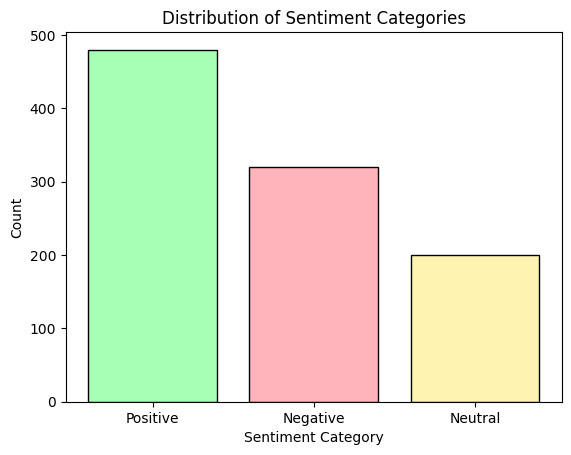

In [9]:
import matplotlib.pyplot as plt

# Define pastel colors for each sentiment category
colors = {'positive': '#a6ffb2', 'negative': '#ffb3ba', 'neutral': '#fff3b2'}

# Plot the distribution of sentiment categories with pastel colors and borders
sentiment_counts = df['SentimentCategory'].value_counts()
plt.bar([sentiment.capitalize() for sentiment in sentiment_counts.index], sentiment_counts.values, color=[colors.get(x, 'gray') for x in sentiment_counts.index], edgecolor='black')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Categories')
plt.show()

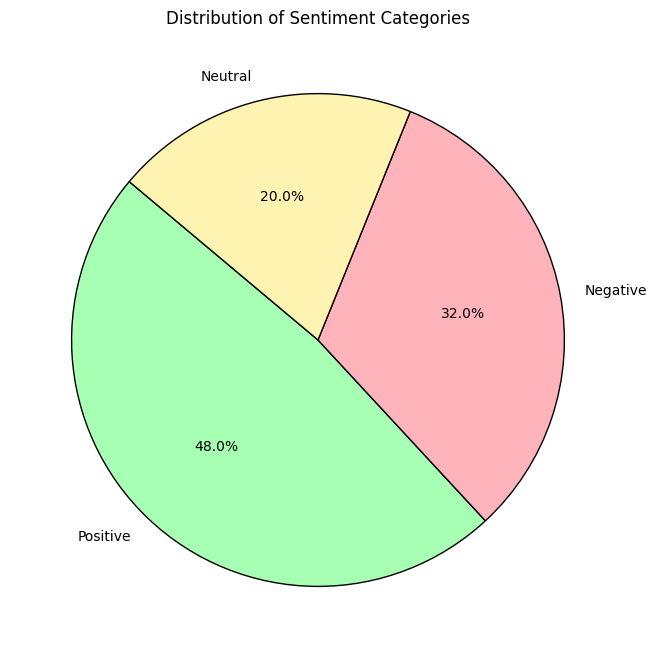

In [10]:
import matplotlib.pyplot as plt

# Define pastel colors for each sentiment category
colors = {'positive': '#a6ffb2', 'negative': '#ffb3ba', 'neutral': '#fff3b2'}

# Count the occurrences of each sentiment category
sentiment_counts = df['SentimentCategory'].value_counts()

# Plot a pie chart with pastel colors to visualize the distribution of sentiment categories
plt.figure(figsize=(8, 8))

# Customize pie chart slices
wedges, texts, autotexts = plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=[colors.get(x, 'gray') for x in sentiment_counts.index], wedgeprops=dict(edgecolor='black'))

# Capitalize labels
for text in texts:
    text.set_text(text.get_text().capitalize())

# Set first letter of autotexts to uppercase
for autotext in autotexts:
    autotext.set_text(autotext.get_text().capitalize())

plt.title('Distribution of Sentiment Categories')
plt.show()

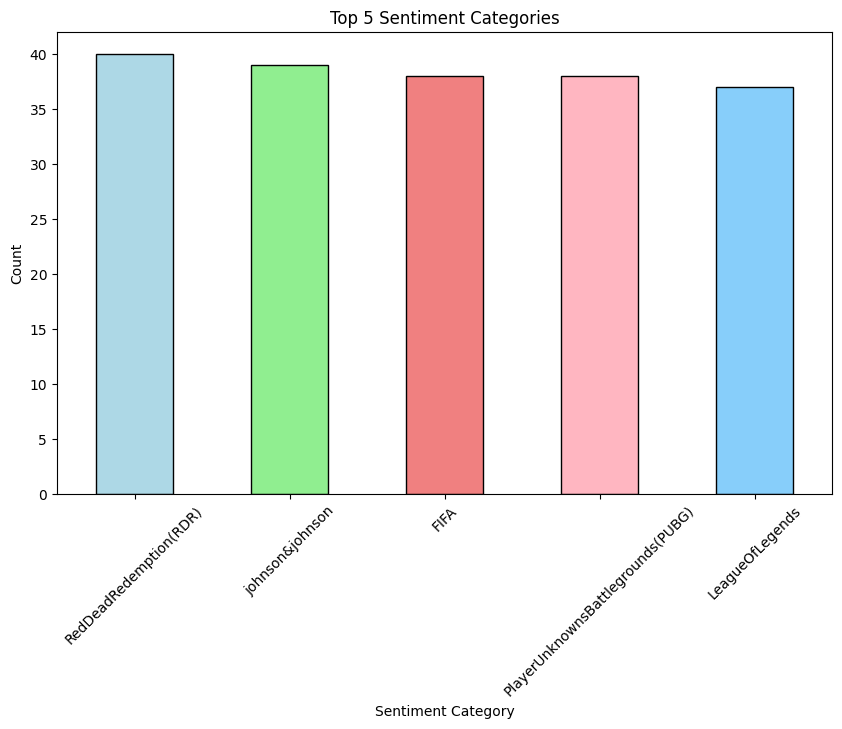

In [11]:
import matplotlib.pyplot as plt

# Assuming sentiment scores are in the second column (index 1)
# Count the occurrences of each sentiment category
sentiment_counts = df[1].value_counts().nlargest(5)

# Define light colors for the bars
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightpink', 'lightskyblue']

# Plot a bar chart with light colors and borders
plt.figure(figsize=(10, 6))
sentiment_counts.plot(kind='bar', color=colors, edgecolor='black')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.title('Top 5 Sentiment Categories')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x800 with 0 Axes>

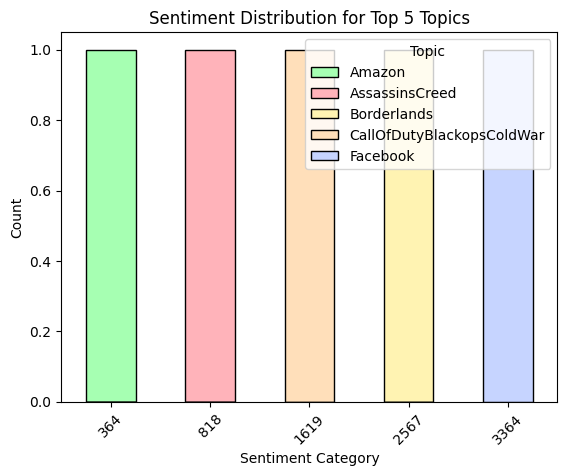

In [12]:
import matplotlib.pyplot as plt

# Assuming the dataset has a column representing topics and sentiment categories are in the second column (index 1)
# Count the occurrences of each sentiment category for each topic
top_topics = df[0].value_counts().nlargest(5).index
sentiment_counts_by_topic = df[df[0].isin(top_topics)].groupby(0)[1].value_counts().unstack(fill_value=0)

# Define pastel colors for each sentiment category
colors = ['#a6ffb2', '#ffb3ba', '#fff3b2', '#ffdfba', '#c6d4ff']  # Add more colors if needed

# Plot bar chart for sentiment distribution for top 5 topics
plt.figure(figsize=(12, 8))  # Increase the figure size
sentiment_counts_by_topic.plot(kind='bar', stacked=True, color=colors, edgecolor='black')  # Use pastel colors with black border
plt.xlabel('Sentiment Category')  # Change x-label to sentiment category
plt.ylabel('Count')  # Keep y-label as count
plt.title('Sentiment Distribution for Top 5 Topics')  # Keep the title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Topic')  # Change legend title to topic
plt.show()

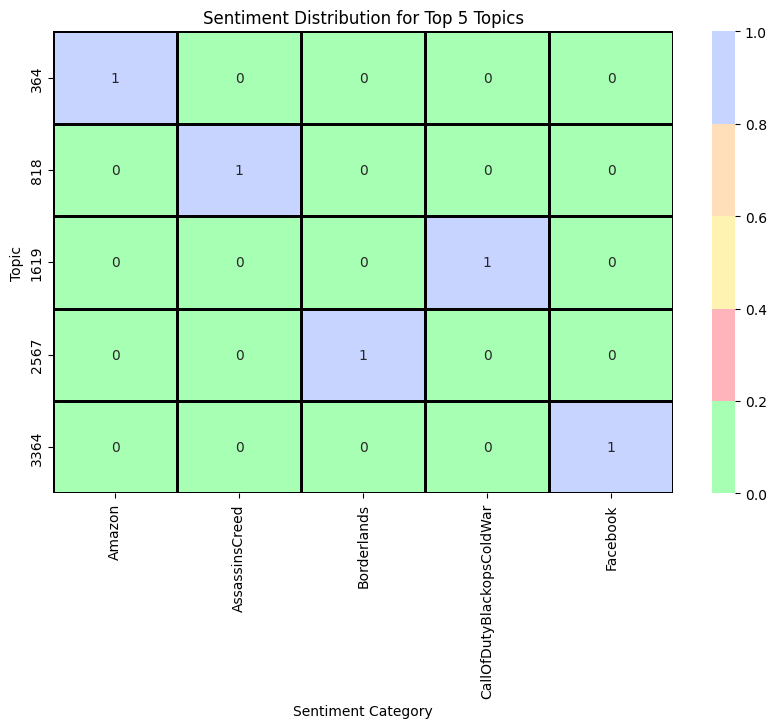

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define pastel colors
pastel_colors = ['#a6ffb2', '#ffb3ba', '#fff3b2', '#ffdfba', '#c6d4ff']  # Add more colors if needed

# Create a custom colormap using pastel colors
cmap = mcolors.ListedColormap(pastel_colors)

# Assuming the dataset has a column representing topics and sentiment categories are in the second column (index 1)
# Count the occurrences of each sentiment category for each topic
top_topics = df[0].value_counts().nlargest(5).index
sentiment_counts_by_topic = df[df[0].isin(top_topics)].groupby(0)[1].value_counts().unstack(fill_value=0)

# Plot heatmap for sentiment distribution for top 5 topics with borders
plt.figure(figsize=(10, 6))
sns.heatmap(sentiment_counts_by_topic, annot=True, fmt='d', cmap=cmap, linewidths=1, linecolor='black')  # Add borders
plt.xlabel('Sentiment Category')
plt.ylabel('Topic')
plt.title('Sentiment Distribution for Top 5 Topics')
plt.show()